IoT tabanlı risk izleme sistemi aracılığıyla Bangladeş'in kırsal bölgelerindeki farklı hastanelerden, 
toplum kliniklerinden ve anne sağlığı hizmetlerinden veriler toplandı.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv("Maternal Health Risk Data Set.csv")
data.head()   # ilk 5 veri

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [32]:
df = data.copy() ## Ana veriyi bozmamak için veri setini kopyalıyorum.

### Veri seti ile ilgili bilgiler
* Age --> Bir kadının hamile olduğu yıl cinsinden herhangi bir yaş.
* SystolicBP --> Kan Basıncının mmHg("milimetre cıva") cinsinden üst değeri, hamilelik sırasındaki bir diğer önemli özelliktir.
* DiastolicBP --> Kan Basıncının mmHg("milimetre cıva") cinsinden daha düşük değeri, hamilelik sırasındaki bir diğer önemli özelliktir.
* BS --> Kan şekeri seviyeleri molar konsantrasyon cinsindendir.    (mmol/L)
* BodyTemp --> Vücut Sıcaklığı   (F-->Fahrenheit)
* HeartRate --> Normal bir dinlenme kalp atış hızı  (bpm)
* RiskLevel --> Önceki nitelik dikkate alınarak hamilelik sırasında Tahmin Edilen Risk Yoğunluğu Düzeyi.

#### Sistolik Kan basıncı
Kanın damar içine pompalanma olayı damarlardaki basıncın artmasına neden olur. 
Kalbin kasılması sırasında ulaşılan en yüksek kan basıncına “sistolik kan basıncı” denir.
Hipertansiyon hastalarında büyük tansiyon 140 mmHg altında, 
küçük tansiyon ise 90 mmHg altında olmalıdır.
Kalbin kanı vücuda pompaladığı ya da farklı bir deyişle kalbin kasıldığı sırada kan damarlarında oluşan basınç en yüksek seviyede olur. Bu basınç türü sistolik kan basıncı olarak tanımlanır. Halk arasında büyük tansiyon olarak da bilinen sistolik kan basıncı değerinin ortalama olarak 120 ila 130 mmHg aralığında olması beklenir. Bu aralık, kan basıncı seviyesinin kişiden kişiye göre farklılık göstermesinden kaynaklanır. Farklı sağlık problemlerinin varlığında ya da yaşın artmasıyla birlikte damarlar esnekliğini kaybedebilir. Bu durumda kişinin kan basınç değeri yüksek olur.

#### Diyastolik Kan Basıncı
Kalp, gün içinde ortalama 100 bin kez atarak sürekli olarak vücuda kan pompalar.
Kalbin kasıldığı sırada oluşan sistolik kan basıncına ek olarak kalbin her iki atımı arasında da damarlarda bir miktar basınç bulunur.
Kalbin kasılmasıyla oluşan kan basıncının etkisiyle genişleyen damarlar, kalbin atım aralığı sırasında kana basınç uygulayarak kan akımının devam etmesini sağlar.
Damarlarda bulunan bu basınç, diyastolik kan basıncı ya da halk arasında yaygın olarak bilinen adıyla küçük tansiyon olarak bilinir.
Diyastolik kan basıncının 70 ila 90 mmHg aralığında olması normal kabul edilir.

In [33]:
data.describe().T  # Descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [34]:
data.info()  #Sütun veri tipleri ve toplam veri sayısı hakkında vs. bilgi verir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [35]:
data.isna().sum()  # Boş değer var mı?

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [36]:
RiskLevel = {'low risk':1, 
        'mid risk':2, 
        'high risk':3}

# apply using map
df['RiskLevel'] = df['RiskLevel'].map(RiskLevel).astype(float)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,3.0
1010,55,120,90,18.0,98.0,60,3.0
1011,35,85,60,19.0,98.0,86,3.0
1012,43,120,90,18.0,98.0,70,3.0


In [37]:
data.nunique()  # Tekrarlayan değer

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

In [38]:
data["Age"].unique()  # Herhangi bir sütuna ait unique değerler.

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46],
      dtype=int64)

In [39]:
data["SystolicBP"].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78], dtype=int64)

In [40]:
data["DiastolicBP"].unique()

array([ 80,  90,  70,  85,  60,  89,  75, 100,  50,  65,  95,  49,  63,
        69,  76,  68], dtype=int64)

In [41]:
data["BS"].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

In [42]:
data["BodyTemp"].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [43]:
data["HeartRate"].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7],
      dtype=int64)

In [44]:
data["RiskLevel"].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [45]:
data.duplicated().sum()   # Tekrarlanan toplam kaç veri var.

562

### Data Visualization

In [46]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


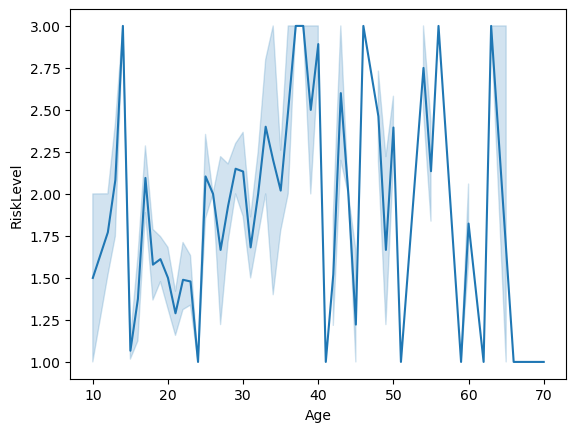

In [47]:
sns.lineplot(data=df,x="Age",y="RiskLevel");  # grafik daha yorumlanabilir olsun diye düzenlediğim "df" kullandım.

In [48]:
np.sort(data["Age"].unique())  # Grafikte 10,12,13 Yaşında Anne olanlar vardı.İncelemek için sıraladım.

array([10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 48, 49, 50, 51, 54, 55, 56, 59, 60, 62, 63, 65, 66, 70],
      dtype=int64)

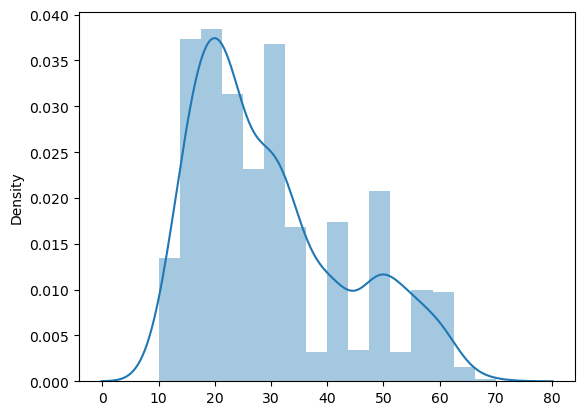

In [49]:
sns.distplot(x=df["Age"]); #Yaş 20-22 arası yoğunluk fazla

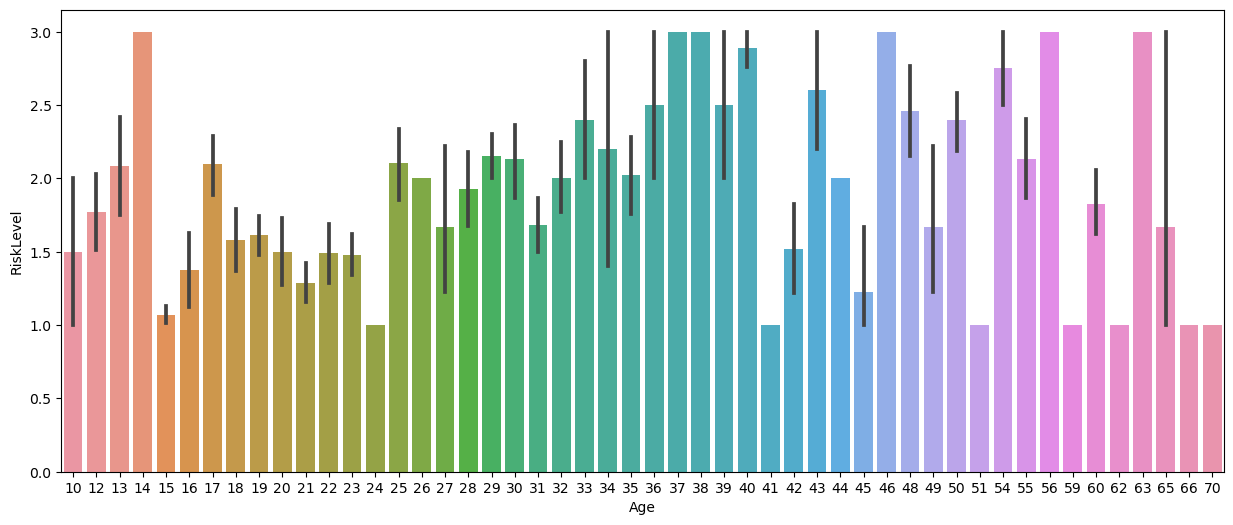

In [50]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=df,x="Age",y="RiskLevel");

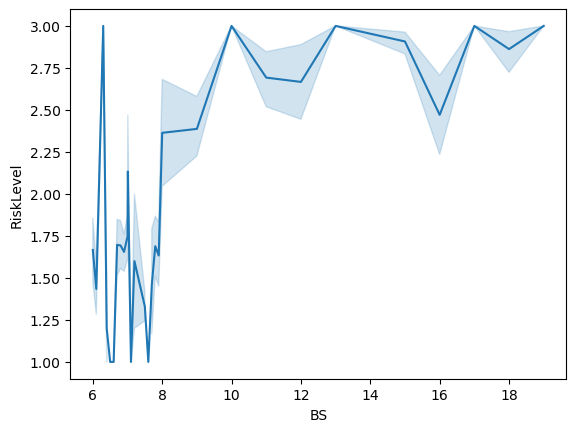

In [51]:
sns.lineplot(data=df,x="BS",y="RiskLevel");  #Kan şekeri yükseldikçe Risk seviyesi artıyor.

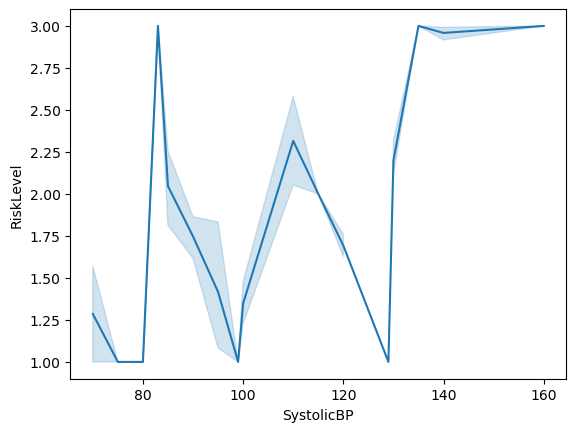

In [52]:
sns.lineplot(data=df,x="SystolicBP",y="RiskLevel");

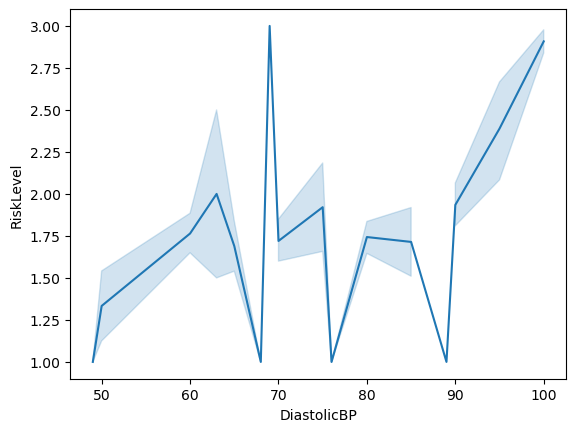

In [53]:
sns.lineplot(data=df,x="DiastolicBP",y="RiskLevel");

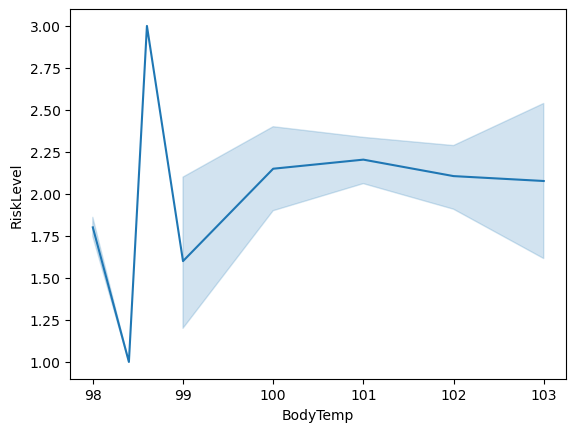

In [54]:
sns.lineplot(data=df,x="BodyTemp",y="RiskLevel");

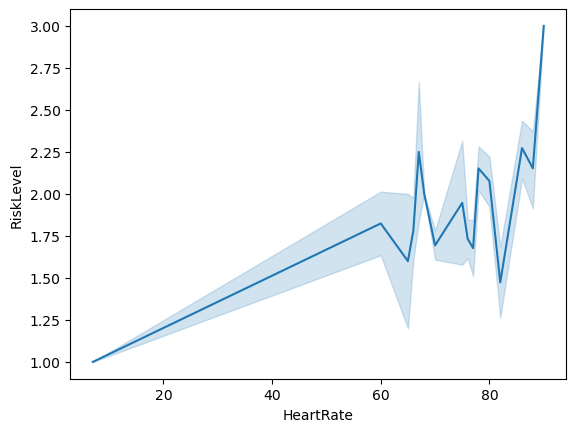

In [55]:
sns.lineplot(data=df,x="HeartRate",y="RiskLevel");  # Neredeyse Doğrusal bir artış var

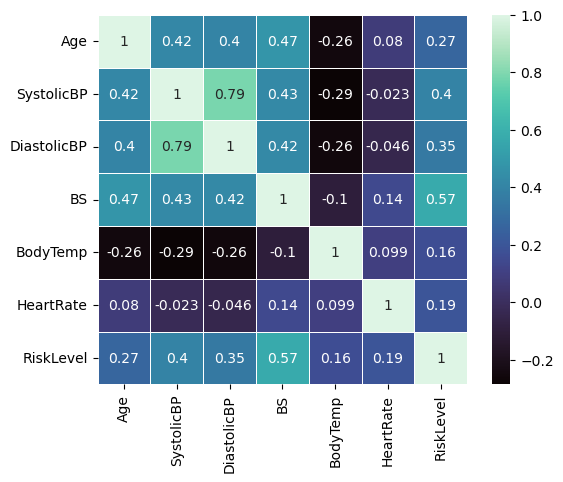

In [56]:
sns.heatmap(data=df.corr(),
            annot=True,
            linewidths=0.7,
            linecolor="white",
            cbar=True,
            square=True,
            cmap="mako");

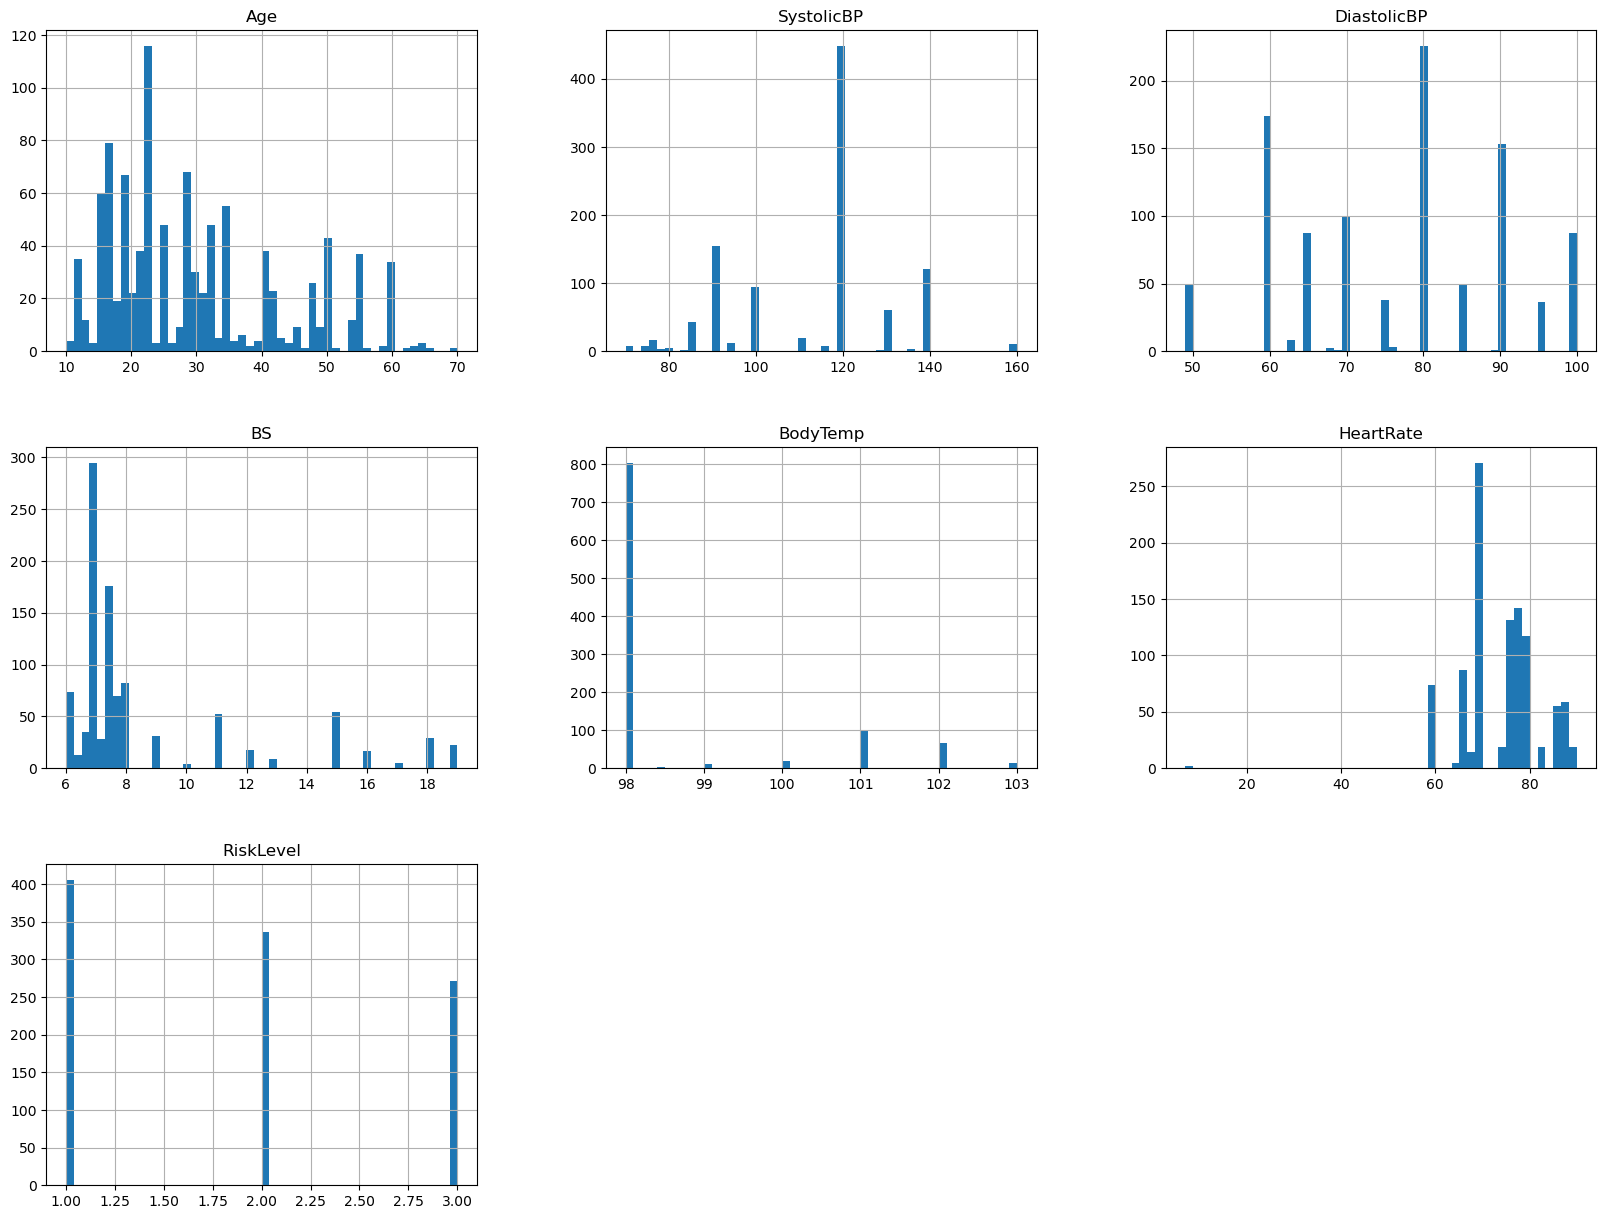

In [57]:
df.hist(bins=50, figsize=(20, 15));
plt.show()

In [58]:
df['RiskLevel'].value_counts()

1.0    406
2.0    336
3.0    272
Name: RiskLevel, dtype: int64

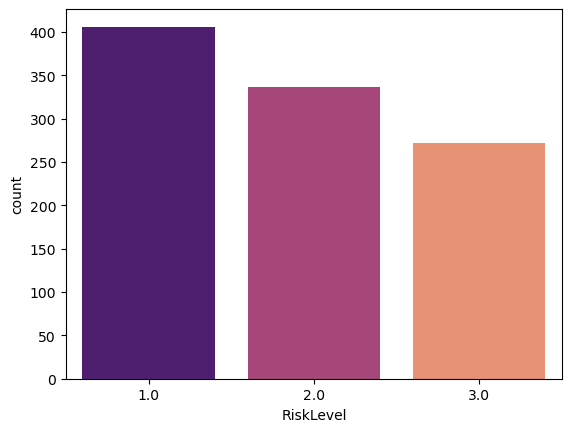

In [59]:
sns.countplot(data=df,x="RiskLevel",palette="magma");

### Modelling

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [61]:
X = df.drop("RiskLevel",axis=1)
y = df["RiskLevel"]
X.shape, y.shape

((1014, 6), (1014,))

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((709, 6), (305, 6), (709,), (305,))

In [63]:
#StandardScaler
ss = StandardScaler()
ss.fit_transform(X_train)

ss.fit_transform(X_test)

array([[-0.45788549,  0.36716859,  0.93677946, -0.38291121, -0.47002282,
        -0.55299614],
       [-0.45788549,  0.90453144, -0.47104382, -0.55737343, -0.47002282,
        -0.55299614],
       [ 0.46140189, -0.70755713, -0.47104382, -0.38291121, -0.47002282,
        -1.08971475],
       ...,
       [-0.45788549, -1.24491998, -1.17495546, -0.52538869, -0.47002282,
         0.25208177],
       [ 0.38479461, -1.51360141, -1.17495546,  0.63478508,  2.47063277,
         1.59387829],
       [-0.68770734, -0.17019427, -1.17495546, -0.52829639,  1.00030497,
        -0.55299614]])

In [64]:
##SVC
from sklearn.svm import SVC
svm = SVC(kernel="rbf",random_state=0,
         gamma=0.10) #Dağılımın genişliğini gamma hiperparametresi ile kontrol ederiz. Gamma ne kadar küçükse dağılım o kadar geniş olur.
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.7049180327868853